# Analyzing Fitbit Data in iPython

Using the Fitbit Python library I downloaded the Fitbit activity, calorie and weight data. This notebook then analyzes the data as a way to learn about iPython.

In [4]:
# This is required to get plots to display inline
%matplotlib inline
# Additional setup
%cd /Users/dane/src/fitbit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dane=pd.read_csv('dane.csv')
cindy=pd.read_csv('cindy.csv')
cindy.head()

/Users/dane/src/fitbit


,date,user,actcal,active1,active2,active3,calories,date.1,distance,elevation,floors,margcal,sedentary,steps,weight
0,2012-12-15,cindy,1110,117,94,61,2224,2012-12-15,8.28,220,22,689,669,17442,153.0
1,2012-12-16,cindy,1524,185,128,75,2529,2012-12-16,10.94,250,25,922,1052,23434,0.0
2,2012-12-17,cindy,865,158,89,19,1988,2012-12-17,5.84,20,2,450,1174,12473,153.9
3,2012-12-18,cindy,1129,198,122,22,2178,2012-12-18,6.15,60,6,582,1098,13202,153.5
4,2012-12-19,cindy,918,217,71,16,2003,2012-12-19,5.79,0,0,447,1136,12330,153.4


In [5]:
print('Average distance per day was {:3.1f}/{:3.1f} miles for dane/cindy'.format(np.average(dane['distance']),np.average(cindy['distance'])))

Average distance per day was 8.2/8.1 miles for dane/cindy


In [6]:
print('The most steps in a day was: {}/{} for dane/cindy'.format(max(dane['steps']), max(cindy['steps'])))

The most steps in a day was: 43958/44847 for dane/cindy


In [7]:
# Basic Stats
for n, i in [('Cindy', cindy), ('Dane', dane)]:
    print('{}'.format(n.title()))
    print('  Average steps: {:,}'.format(int(i.steps.mean())))
    print('  Total steps: {:,}'.format(i.steps.sum()))
    print('  Total distance: {:,}'.format(int(i.distance.sum())))
    

Cindy
  Average steps: 17,326
  Total steps: 30,615,872
  Total distance: 14,348
Dane
  Average steps: 16,834
  Total steps: 30,504,891
  Total distance: 14,785


In [8]:
cindy.steps.sum()/cindy.distance.sum()

2133.7337170461992

In [9]:
dane.steps.sum()/dane.distance.sum()

2063.1880823460988

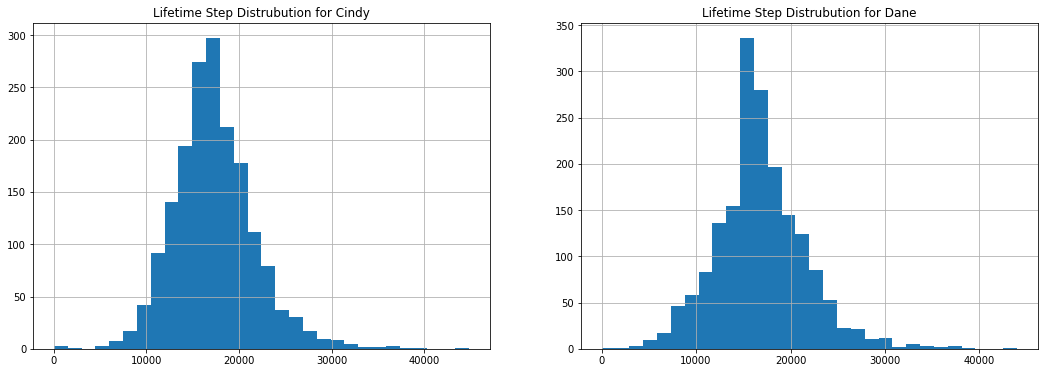

In [10]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.figure(1)
plt.subplot(121) # numrows, numcols, fignum
cindy['steps'].hist(bins=30)
plt.title('Lifetime Step Distrubution for Cindy')
plt.subplot(122)
dane['steps'].hist(bins=30)
plt.title('Lifetime Step Distrubution for Dane')
plt.show()

In [16]:
cindy['year'] = cindy.date.apply(lambda x: int(x[0:4]))
dane['year'] = dane.date.apply(lambda x: int(x[0:4]))

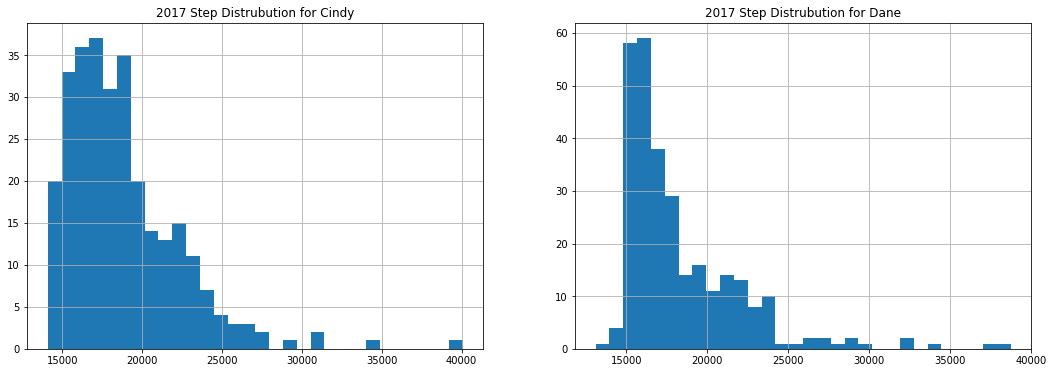

In [17]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.figure(1)
plt.subplot(121) # numrows, numcols, fignum
cindy[cindy.year==2017]['steps'].hist(bins=30)
plt.title('2017 Step Distrubution for Cindy')
plt.subplot(122)
dane[dane.year==2017]['steps'].hist(bins=30)
plt.title('2017 Step Distrubution for Dane')
plt.show()


In [18]:
# Basic Stats
for n, i in [('Cindy', cindy), ('Dane', dane)]:
    print('{}'.format(n.title()))
    for y in [2013, 2014, 2015, 2016, 2017]:
        d = i[i.year == y]
        print('  Average steps for {}: {:,}'.format(y, int(d['steps'].mean())))


Cindy
  Average steps for 2013: 13,820
  Average steps for 2014: 17,735
  Average steps for 2015: 17,715
  Average steps for 2016: 19,002
  Average steps for 2017: 18,791
Dane
  Average steps for 2013: 13,691
  Average steps for 2014: 18,049
  Average steps for 2015: 17,243
  Average steps for 2016: 18,021
  Average steps for 2017: 18,318


In [20]:
min(cindy16.date)

'2017-01-01'

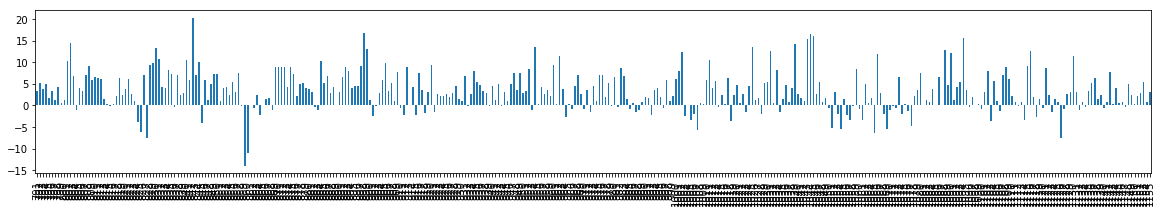

In [24]:
cindy_y = dane[i.year==2015]
ou = (cindy_y.steps - 14000)/1000
fig = plt.gcf()
fig.set_size_inches(20,3)
ou.plot(kind='bar')


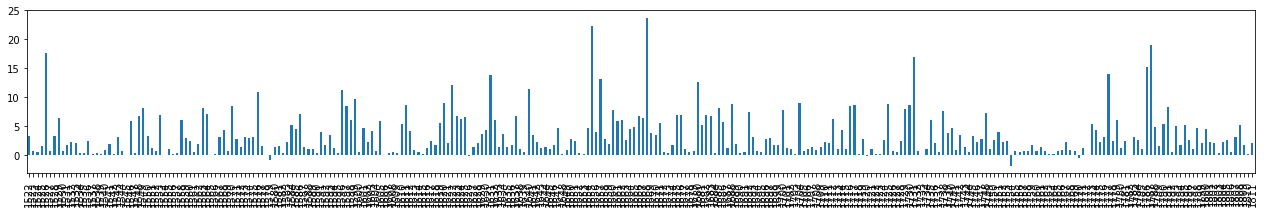

In [26]:
dane16 = dane[i.year==2017]
ou = (dane16.steps - 15000)/1000
fig = plt.gcf()
fig.set_size_inches(22,3)
ou.plot(kind='bar')

In [35]:
cindy['reached_goal'] = 0
cindy.loc[(cindy.steps - 14000) > 0, 'reached_goal'] = 1
dane['reached_goal'] = 0
dane.loc[(dane.steps - 15000) > 0, 'reached_goal'] = 1

In [41]:
cindy['month'] = cindy.date.apply(lambda x: int(x[5:7]))

In [44]:
cindy[cindy.year == 2017].date.max()

'2017-10-31'

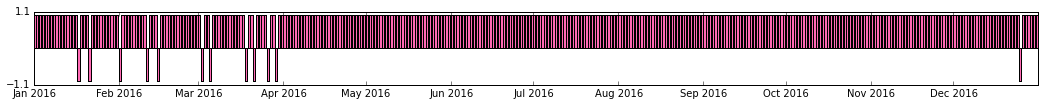

In [107]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.figure(1)
plt.subplot(411)
cindy16.index=pd.to_datetime(x.date,format='%Y-%m-%d')
plt.bar(cindy16.index, cindy16.goalmet, color='hotpink')
plt.yticks([-1.1,1.1])
plt.show()

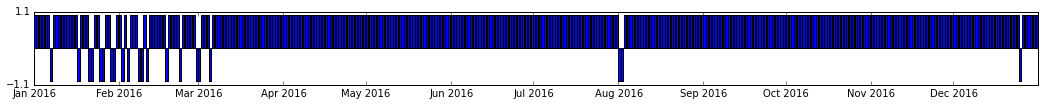

In [114]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.figure(1)
plt.subplot(411)
dane16.index=pd.to_datetime(dane16.date,format='%Y-%m-%d')
plt.bar(dane16.index, dane16.goalmet, color='blue')
plt.yticks([-1.1,1.1])
plt.show()

In [115]:
dane16.index[0]

Timestamp('2016-01-01 00:00:00')

In [118]:
datetime.week(dane16.index[0])

AttributeError: module 'datetime' has no attribute 'week'

In [117]:
import datetime